*Data* Analysis for Anthony's initial data

In [ ]:
# Relevant Standard Processing Libraries
import math
import re
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
from IPython.display import Image
import glob
import seaborn as sns
import re
import os
import zipfile


In [ ]:
!pip3 install pandas_profiling --upgrade

# Load the Data
- Insert the .csv files for performance
- These files can cleaned or not clean

Key - 
- gazeData - contains the time in milliseconds it takes for me to recognize the target
- clickData - the time in milliseconds it takes to click the target
- distData - formatted as follows: (distance to target, target x coord, target y coord)
the distance data is in unity Viewport Coordinates (Bottom left of screen is 0,0 and Top right is 1,1)

In [ ]:
# Load the Relevant Files
from google.colab import files
uploaded = files.upload()

In [ ]:
with zipfile.ZipFile('/content/CoordinateData.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
performance_trial_11_df =  pd.read_csv("/content/CoordinateData/Trial 11/performance.csv", header=0);
performance_trial_12_df =  pd.read_csv("/content/CoordinateData/Trial 12/performance.csv", header=0);
performance_trial_13_df =  pd.read_csv("/content/CoordinateData/Trial 13/performance.csv", header=0);
performance_trial_14_df =  pd.read_csv("/content/CoordinateData/Trial 14/performance.csv", header=0);
performance_trial_15_df =  pd.read_csv("/content/CoordinateData/Trial 15/performance.csv", header=0);

performance_trial_11_df = performance_trial_11_df.filter(['ClickTime', 'GazeTime', 'GazeDistance', 'TargetX', 'TargetY'])
performance_trial_12_df = performance_trial_12_df.filter(['ClickTime', 'GazeTime', 'GazeDistance', 'TargetX', 'TargetY'])
performance_trial_13_df = performance_trial_13_df.filter(['ClickTime', 'GazeTime', 'GazeDistance', 'TargetX', 'TargetY'])
performance_trial_14_df = performance_trial_14_df.filter(['ClickTime', 'GazeTime', 'GazeDistance', 'TargetX', 'TargetY'])
performance_trial_15_df = performance_trial_15_df.filter(['ClickTime', 'GazeTime', 'GazeDistance', 'TargetX', 'TargetY'])


frames = [performance_trial_11_df, performance_trial_12_df, performance_trial_13_df, performance_trial_14_df, performance_trial_15_df]
performance_trial_combined_df = pd.concat(frames,ignore_index=True)
performance_trial_combined_df = performance_trial_combined_df.reindex(performance_trial_combined_df.index)


# Shape of the dataframes
print(performance_trial_11_df.shape);
print(performance_trial_12_df.shape);
print(performance_trial_13_df.shape);
print(performance_trial_14_df.shape);
print(performance_trial_15_df.shape);
print(performance_trial_combined_df.shape);



(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)
(100, 5)


In [ ]:
performance_trial_combined_df.head(10)

,ClickTime,GazeTime,GazeDistance,TargetX,TargetY
0,881.7595,38.2568,-0.044531,0.315589,0.426251
1,616.1844,0.0325,-1.000000,0.546103,0.794997
2,497.3799,0.0284,-1.000000,0.269486,0.794997
3,672.4967,272.1994,0.482861,0.361692,0.278752
4,520.2196,0.0000,0.184383,0.592205,0.426251
5,475.3609,278.3345,0.125378,0.361692,0.426251
6,475.6227,0.0000,0.286376,0.500000,0.131254
7,466.5169,195.3550,0.097216,0.546103,0.500000
8,553.8677,0.0000,0.246582,0.315589,0.205003
9,461.2538,192.4327,0.009488,0.407795,0.352501


In [ ]:
# Export final_cleaned to CSV 
performance_trial_combined_df.to_csv(r'performance_trial_combined_df.csv', index = False, header=True)
from google.colab import files
files.download("performance_trial_combined_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Clean The Data

In [ ]:
# clean
performance_trial_combined_df['GazeDistance'].apply(lambda x : x < -x else x)
performance_trial_combined_df.shape

SyntaxError: ignored

# Visualize the Data 

In [ ]:
# Visualize the uncleaned data 
from pandas_profiling import ProfileReport
report = ProfileReport(performance_trial_11_df)
report.to_file(output_file='summary_of_performance_values.html')

In [ ]:
# clean
columns = ['GazeTime']
performance_trial_combined_df = performance_trial_combined_df.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns)

performance_trial_combined_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


(81, 6)

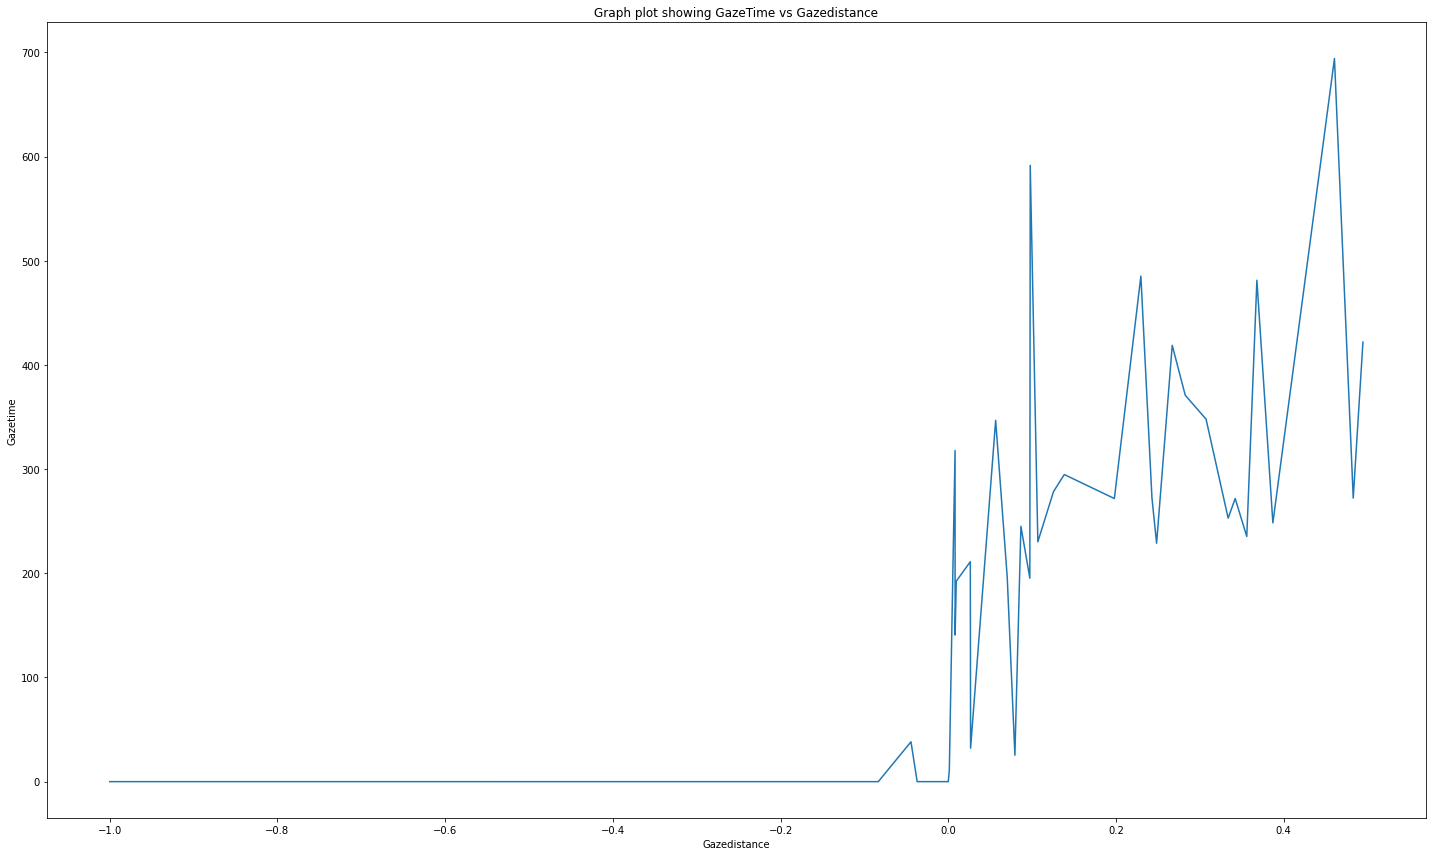

In [ ]:
plt.figure(figsize=(20,12))
g = sns.lineplot(data=performance_trial_combined_df, x=performance_trial_combined_df.GazeDistance,y='GazeTime')
g.set_title("Graph plot showing GazeTime vs Gazedistance")
g.set_ylabel("Gazetime")
g.set_xlabel("Gazedistance")
plt.tight_layout()

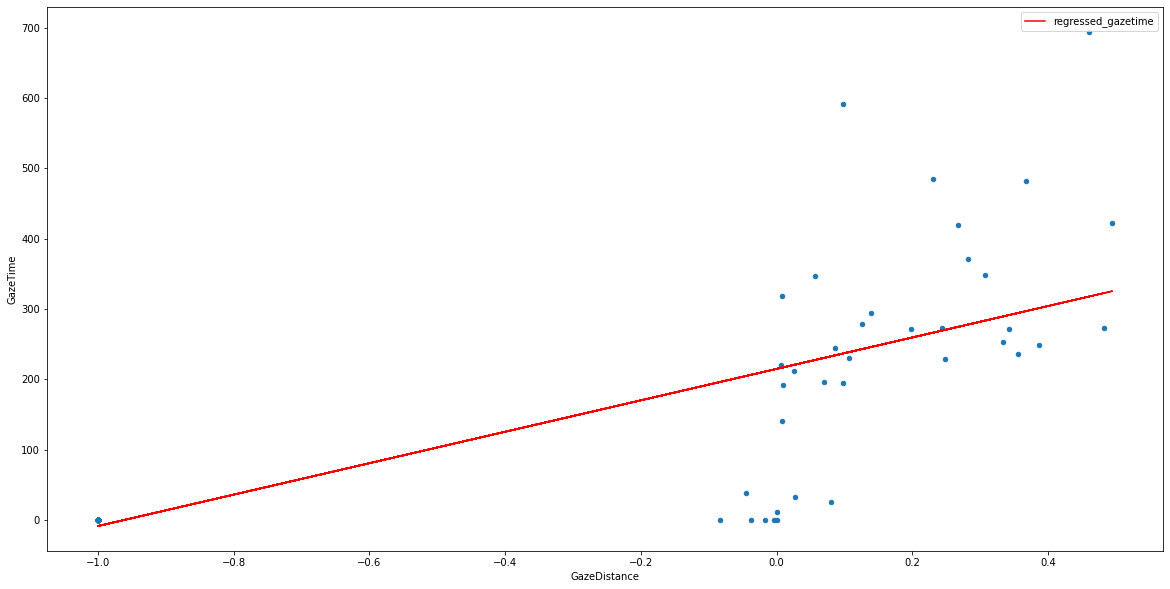

In [ ]:
d = np.polyfit(performance_trial_combined_df['GazeDistance'],performance_trial_combined_df['GazeTime'],1)
f = np.poly1d(d)
performance_trial_combined_df.insert(1,'regressed_gazetime',f(performance_trial_combined_df['GazeDistance']))
ax = performance_trial_combined_df.plot(kind = 'scatter', x ='GazeDistance',y='GazeTime', figsize=(20, 10))
performance_trial_combined_df.plot(x='GazeDistance', y='regressed_gazetime',color='Red',ax=ax)

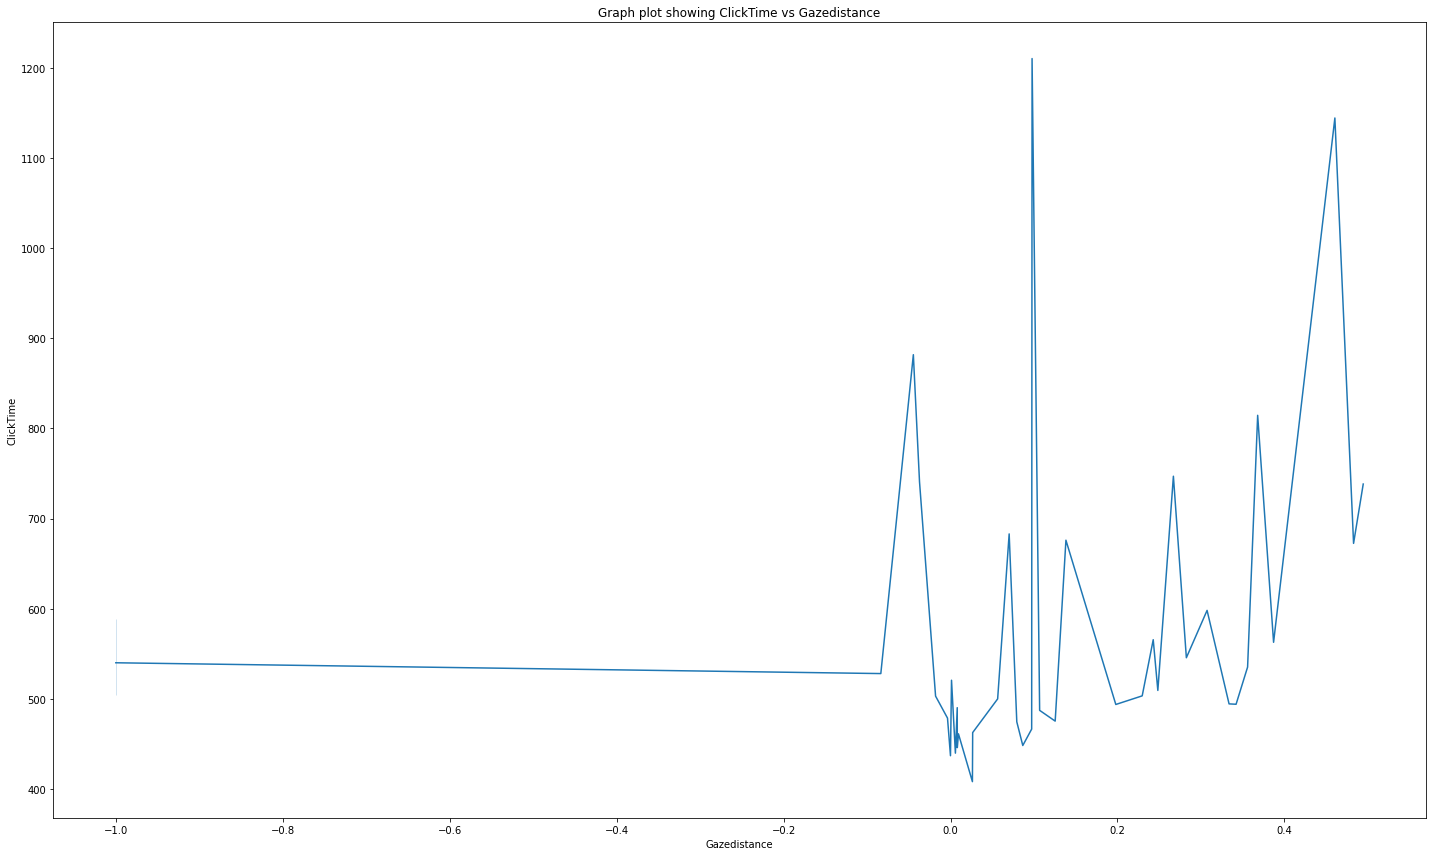

In [ ]:
plt.figure(figsize=(20,12))
g = sns.lineplot(data=performance_trial_combined_df, x=performance_trial_combined_df.GazeDistance,y='ClickTime')
g.set_title("Graph plot showing ClickTime vs Gazedistance")
g.set_ylabel("ClickTime")
g.set_xlabel("Gazedistance")
plt.tight_layout()

<Figure size 1440x864 with 0 Axes>

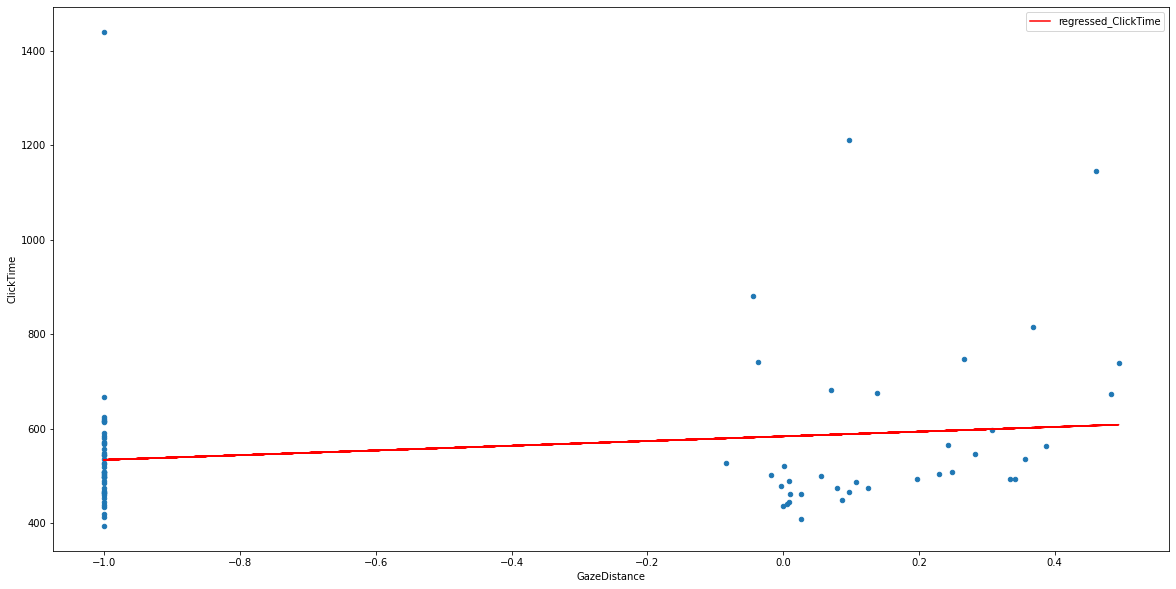

In [ ]:
plt.figure(figsize=(20,12))
d = np.polyfit(performance_trial_combined_df['GazeDistance'],performance_trial_combined_df['ClickTime'],1)
f = np.poly1d(d)
performance_trial_combined_df.insert(1,'regressed_ClickTime',f(performance_trial_combined_df['GazeDistance']))
ax = performance_trial_combined_df.plot(kind = 'scatter', x ='GazeDistance',y='ClickTime', figsize=(20, 10))
performance_trial_combined_df.plot(x='GazeDistance', y='regressed_ClickTime',color='Red',ax=ax)